<a href="https://colab.research.google.com/github/lacykaltgr/satellite-image-segmentation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    root = '/content/drive/MyDrive/colab/sat-images/'
    device = 'cuda'
    !wget -O sat.zip https://github.com/lacykaltgr/satellite-image-segmentation/archive/refs/heads/eye-in-the-sky.zip
    !unzip sat.zip
    !cp satellite-image-recognition-eye-in-the-sky/src .
else:
    root = '/Users/laszlofreund/code/ai/satellite-image-segmentation/data/'
    device = 'mps'

In [3]:
import torch
from torch.utils.data import DataLoader
from src.dataset import XYDataset, load_dataset

x_train, y_train, x_val, y_val, x_test = load_dataset(root)

train_dataset = XYDataset(x_train, y_train)
val_dataset = XYDataset(x_val, y_val)
test_dataset = XYDataset(x_test, torch.zeros(len(x_test)))

batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [4]:
from src.model import UNet, EarlyStopper

unet = UNet()
es = EarlyStopper(patience=10)
unet.train_model(train_loader, val_loader, es, num_epochs=1000, learning_rate=0.01, device=device)

RuntimeError: MPS backend out of memory (MPS allocated: 10.69 GB, other allocations: 7.20 GB, max allowed: 18.13 GB). Tried to allocate 549.18 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

In [ ]:
predictions = unet.predict(test_loader, device=device)

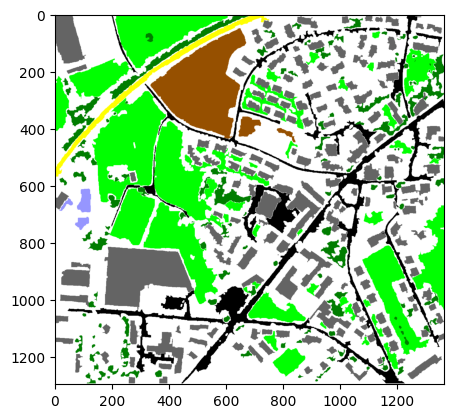

In [37]:
from matplotlib.pyplot import imshow, show
imshow(predictions[0])
show()

In [ ]:
#TODO: confusion matrix